# House Price Prediction Regressor

# Importing Libraries and Loading Dataset

In [2]:
# Importing the necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations

# Loading the dataset from a CSV file
df = pd.read_csv("D:\\data science QT\\notes\\DataSets\\house price prediction dataset.csv")

# Displaying the first 5 rows of the dataframe to get a quick overview of the data
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Exploratory Data Analysis(EDA)

In [3]:
# Displaying the shape of the DataFrame
# This shows the number of rows and columns in the dataset
df.shape

(1460, 81)

In [4]:
# Checking for missing values in each column
# df.isnull().sum() returns the total number of missing values in each column of the DataFrame
df.isnull().sum()


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

# Selecting and Displaying Numeric Columns

In [5]:

# Assuming cleaned_df is your DataFrame
numeric_df = df.select_dtypes(include=['number'])

# Display the numeric DataFrame
numeric_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [6]:
# Checking for missing values in each column
# numeric_df.isnull().sum() returns the total number of missing values in each column of the DataFrame
numeric_df.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [7]:
# Fill null values with the median of each column
null_fill_median=numeric_df.fillna(numeric_df.median())
null_fill_median

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [8]:
# Checking for missing values after filling with median
# null_fill_median is assumed to be a DataFrame where missing values have been filled with the median
# df.isna().sum() returns the total number of missing values in each column
null_fill_median.isna().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [9]:
# Calculating the correlation matrix
# correlation_matrix will contain the correlation coefficients between numeric columns in the DataFrame
# null_fill_median.corr() computes the pairwise correlation of columns, which measures the strength and direction of their linear relationship
correlation_matrix = null_fill_median.corr()


# Selecting and Filtering Features Based on Correlation

In [10]:
# Select the target variable

# Get the correlations with the target variable
correlation_with_target = correlation_matrix['SalePrice']

# Filter out columns with correlation between -0.3 and 0.3
columns_to_drop = correlation_with_target[(correlation_with_target >= -0.3) & (correlation_with_target <=0.3)].index

# Drop the filtered columns from the dataframe
df_filtered = null_fill_median.drop(columns=columns_to_drop)

# Print the filtered dataframe's first few rows
df_filtered.head()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,65.0,7,2003,2003,196.0,706,856,856,854,1710,2,8,0,2003.0,2,548,0,61,208500
1,80.0,6,1976,1976,0.0,978,1262,1262,0,1262,2,6,1,1976.0,2,460,298,0,181500
2,68.0,7,2001,2002,162.0,486,920,920,866,1786,2,6,1,2001.0,2,608,0,42,223500
3,60.0,7,1915,1970,0.0,216,756,961,756,1717,1,7,1,1998.0,3,642,0,35,140000
4,84.0,8,2000,2000,350.0,655,1145,1145,1053,2198,2,9,1,2000.0,3,836,192,84,250000


# Finding And Removeing outlier for numaric data using IQR

In [12]:
!pip install seaborn

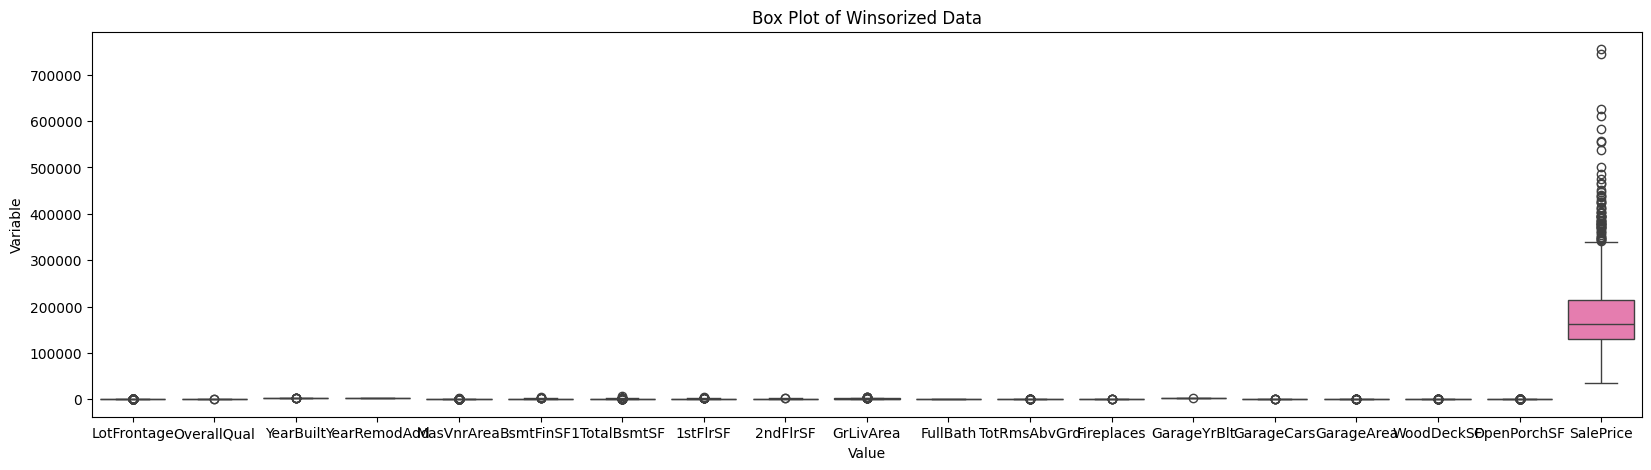

In [13]:
# Plot box plot
import pandas as pd
from scipy.stats import mstats
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 5))
sns.boxplot(data=df_filtered, orient='v')
plt.title('Box Plot of Winsorized Data')
plt.xlabel('Value')
plt.ylabel('Variable')
plt.show()

In [14]:
#Calculate IQR for each numeric column
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Define a function to handle outliers
def handle_outliers(series):
    lower_bound = Q1[series.name] - 1.5 * IQR[series.name]
    upper_bound = Q3[series.name] + 1.5 * IQR[series.name]
    return series.clip(lower_bound, upper_bound)

# Apply the function to handle outliers
iqr_handled_df = df_filtered.apply(handle_outliers)

# Print the resulting DataFrame
iqr_handled_df.head()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,65.0,7,2003,2003,196.0,706.0,856,856.0,854,1710.0,2,8,0.0,2003.0,2.0,548.0,0,61,208500.0
1,80.0,6,1976,1976,0.0,978.0,1262,1262.0,0,1262.0,2,6,1.0,1976.0,2.0,460.0,298,0,181500.0
2,68.0,7,2001,2002,162.0,486.0,920,920.0,866,1786.0,2,6,1.0,2001.0,2.0,608.0,0,42,223500.0
3,60.0,7,1915,1970,0.0,216.0,756,961.0,756,1717.0,1,7,1.0,1998.0,3.0,642.0,0,35,140000.0
4,84.0,8,2000,2000,350.0,655.0,1145,1145.0,1053,2198.0,2,9,1.0,2000.0,3.0,836.0,192,84,250000.0


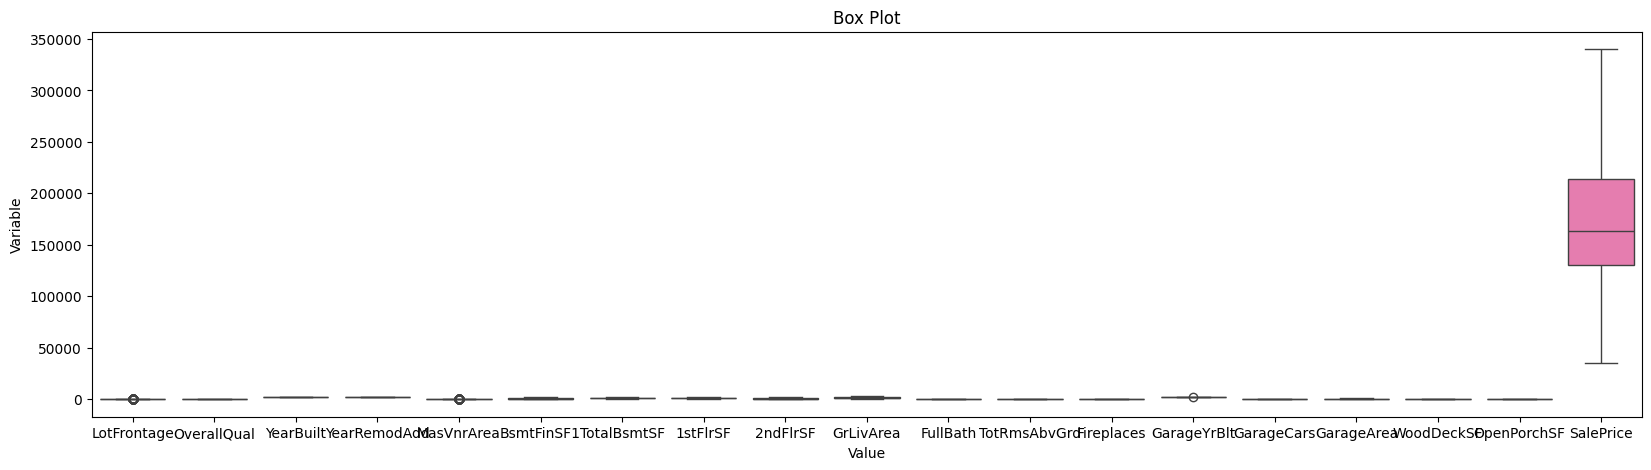

In [15]:
# Plot box plot
import pandas as pd
from scipy.stats import mstats
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 5))
sns.boxplot(data=iqr_handled_df, orient='v')
plt.title('Box Plot')
plt.xlabel('Value')
plt.ylabel('Variable')
plt.show()

In [16]:
# Calculating skewness of each column in the DataFrame
# iqr_handled_df is assumed to be a DataFrame where outliers have been handled using IQR method
# df.skew() computes the skewness for each column, which measures the asymmetry of the distribution of values
iqr_handled_df.skew()

LotFrontage     0.103564
OverallQual     0.249513
YearBuilt      -0.594020
YearRemodAdd   -0.503562
MasVnrArea      1.298728
BsmtFinSF1      0.739877
TotalBsmtSF     0.237240
1stFlrSF        0.664134
2ndFlrSF        0.800109
GrLivArea       0.593556
FullBath        0.036562
TotRmsAbvGrd    0.366919
Fireplaces      0.584655
GarageYrBlt    -0.678333
GarageCars     -0.391629
GarageArea     -0.069685
WoodDeckSF      1.083673
OpenPorchSF     1.136301
SalePrice       0.802786
dtype: float64

# Scaling Numeric Data Using Min-Max Scaler

In [17]:
cat_df = df.select_dtypes(exclude=['number'])
cat_df.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [18]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
# Initialize the MinMaxScalar
scaler = MinMaxScaler()

# Fit the scaler on the numeric data and transform it
scaled_numeric_df = pd.DataFrame(scaler.fit_transform(iqr_handled_df), columns=iqr_handled_df.columns)

# Display the scaled DataFrame
print(scaled_numeric_df)

      LotFrontage  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
0        0.446429        0.625      0.944      0.883333    0.472289   
1        0.625000        0.500      0.728      0.433333    0.000000   
2        0.482143        0.625      0.928      0.866667    0.390361   
3        0.386905        0.625      0.240      0.333333    0.000000   
4        0.672619        0.750      0.920      0.833333    0.843373   
...           ...          ...        ...           ...         ...   
1455     0.410714        0.500      0.912      0.833333    0.000000   
1456     0.684524        0.500      0.744      0.633333    0.286747   
1457     0.458333        0.625      0.448      0.933333    0.000000   
1458     0.482143        0.375      0.520      0.766667    0.000000   
1459     0.565476        0.375      0.640      0.250000    0.000000   

      BsmtFinSF1  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  FullBath  \
0       0.396490     0.404975  0.286636  0.469231   0.570097  0.666667   

# Selecting and Displaying Categorical Columns

In [19]:
cat_df = df.select_dtypes(exclude=['number'])
cat_df.head() 

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [20]:
# Checking for missing values in categorical columns
# cat_df is assumed to be a DataFrame containing only categorical columns
# cat_df.isna().sum() returns the total number of missing values in each categorical column
cat_df.isna().sum()


MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

# Checking for Missing Values in Categorical Columns and filling with mode

In [21]:
# Fill null values in each categorical column with the mode
for column in cat_df.columns:
    mode_value = cat_df[column].mode()[0]  # Get the mode of the column
    cat_df[column].fillna(mode_value, inplace=True)

# Print the first few rows of the modified categorical dataframe
print(cat_df.head())

  MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave  Grvl      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave  Grvl      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave  Grvl      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave  Grvl      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave  Grvl      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1  ... GarageType GarageFinish GarageQual GarageCond  \
0      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
1      Veenker      Feedr  ...     Attchd          RFn         TA         TA   
2      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
3      Crawfor       Norm  ...     Detchd          Unf         TA         TA   
4      NoRidge       Norm  ...     Attchd          RFn         TA         TA   

  PavedDrive PoolQC  Fence MiscFeature SaleType Sa

C:\Users\User\AppData\Local\Temp\ipykernel_1964\3250052726.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cat_df[column].fillna(mode_value, inplace=True)


In [22]:
cat_df.isna().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

# One-Hot Encoding Categorical Columns

In [23]:
# Perform one-hot encoding on all categorical columns
cat_df_encoded = pd.get_dummies(cat_df)

# Convert boolean values to integers
cat_df_encoded = cat_df_encoded.astype(int)

cat_df_encoded

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,1,0,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1457,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1458,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0


# Performing PCA on Encoded Categorical Data

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming cat_df_encoded is your encoded DataFrame

# Standardizing the features
scaler = StandardScaler()
cat_df_scaled = scaler.fit_transform(cat_df_encoded)

# Applying PCA
pca = PCA(n_components=2)  # Specify the number of components
cat_df_pca = pca.fit_transform(cat_df_scaled)
cat_df_encoded=pd.DataFrame(cat_df_pca,columns=['PC1','PC2'])



In [25]:
# Merge the DataFrames along the columns (axis=1)
final_df = pd.concat([scaled_numeric_df, cat_df_encoded], axis=1)

# Print the first few rows of the merged DataFrame
print(final_df .head())

   LotFrontage  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0     0.446429        0.625      0.944      0.883333    0.472289    0.396490   
1     0.625000        0.500      0.728      0.433333    0.000000    0.549245   
2     0.482143        0.625      0.928      0.866667    0.390361    0.272938   
3     0.386905        0.625      0.240      0.333333    0.000000    0.121306   
4     0.672619        0.750      0.920      0.833333    0.843373    0.367848   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  ...  TotRmsAbvGrd  Fireplaces  \
0     0.404975  0.286636  0.469231   0.570097  ...         0.750         0.0   
1     0.606965  0.509575  0.000000   0.384484  ...         0.500         0.4   
2     0.436816  0.321779  0.475824   0.601585  ...         0.500         0.4   
3     0.355224  0.344293  0.415385   0.572997  ...         0.625         0.4   
4     0.548756  0.445329  0.578571   0.772282  ...         0.875         0.4   

   GarageYrBlt  GarageCars  GarageArea

# Spliting Data for Training And Testing

In [26]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = final_df.drop("SalePrice",axis=1)
y =  final_df["SalePrice"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
!pip install mlflow

   ---------------------------------------- 0.0/27.4 MB ? eta -:--:--
    --------------------------------------- 0.5/27.4 MB 2.8 MB/s eta 0:00:10
   - -------------------------------------- 1.3/27.4 MB 3.2 MB/s eta 0:00:09
   -- ------------------------------------- 1.6/27.4 MB 3.1 MB/s eta 0:00:09
   -- ------------------------------------- 1.6/27.4 MB 3.1 MB/s eta 0:00:09
   -- ------------------------------------- 1.6/27.4 MB 3.1 MB/s eta 0:00:09
   -- ------------------------------------- 1.6/27.4 MB 3.1 MB/s eta 0:00:09
   -- ------------------------------------- 1.6/27.4 MB 3.1 MB/s eta 0:00:09
   -- ------------------------------------- 1.6/27.4 MB 3.1 MB/s eta 0:00:09
   -- ------------------------------------- 1.6/27.4 MB 3.1 MB/s eta 0:00:09
   -- ------------------------------------- 1.6/27.4 MB 3.1 MB/s eta 0:00:09
   -- ------------------------------------- 1.6/27.4 MB 3.1 MB/s eta 0:00:09
   -- ------------------------------------- 1.6/27.4 MB 3.1 MB/s eta 0:00:09
   -- 

In [30]:
# Import the MLflow library, which is used for managing the machine learning lifecycle, including experiment tracking, model management, and deployment
import mlflow

In [36]:
import mlflow

# Set a valid local tracking URI
mlflow.set_tracking_uri("file:///D:/data_science_QT/notes/DataSets/mlruns")


In [37]:
mlflow.set_experiment("house price")


2024/12/25 12:18:55 INFO mlflow.tracking.fluent: Experiment with name 'house price' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///D:/data_science_QT/notes/DataSets/mlruns/897882735333151549', creation_time=1735109335438, experiment_id='897882735333151549', last_update_time=1735109335438, lifecycle_stage='active', name='house price', tags={}>

In [38]:
mlflow.set_tracking_uri("file:///C:/mlruns")


In [39]:
pip install --upgrade mlflow


Note: you may need to restart the kernel to use updated packages.


In [40]:
import mlflow

# Set tracking URI
mlflow.set_tracking_uri("file:///D:/data_science_QT/notes/DataSets/mlruns")

# Create experiment
mlflow.set_experiment("test_experiment")

# Log an example run
with mlflow.start_run():
    mlflow.log_param("param1", 5)
    mlflow.log_metric("metric1", 0.85)


2024/12/25 12:22:09 INFO mlflow.tracking.fluent: Experiment with name 'test_experiment' does not exist. Creating a new experiment.


In [41]:
import mlflow

# Set up or create an experiment in MLflow named "house price"
mlflow.set_experiment("house price")

# Add a tag to the experiment with key 'house-tag' and value 'ex1'
mlflow.set_experiment_tag('house-tag', 'ex1')

# Mlflow Integration

In [42]:
with mlflow.start_run():    
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.metrics import r2_score
    
    # model object initialization
    RandFor=RandomForestRegressor(n_estimators=5000,max_depth=6)
    GBM=GradientBoostingRegressor(n_estimators=3000,max_depth=6,learning_rate=0.01,min_samples_split=5)
    rf_n_estimators=5000
    #logging parameters
    mlflow.log_param("n_estimators",rf_n_estimators)
    mlflow.log_param('rf_max_depth',6)
    mlflow.log_param('gbm_n_estimators',3000)
    mlflow.log_param('gbm_max_depth',6)
    mlflow.log_param('gbm_learning_rate',0.01)
    mlflow.log_param('gbm_minimum_samples_split',5)
    
    #training models
    rf=RandFor.fit(X_train,y_train)
    gbm=GBM.fit(X_train,y_train)
    
    #training scores
    training_score_rf=RandFor.score(X_train,y_train)
    training_score_gbm=GBM.score(X_train,y_train)
    
    #logging training score
    mlflow.log_metric("rf_training_score", training_score_rf)
    mlflow.log_metric("gbm_training_score",training_score_gbm)
    
    #value predictions
    y_pred_rf=rf.predict(X_test)
    y_pred_gbm=gbm.predict(X_test)
    
    #prediction evaluations
    testing_score_rf=r2_score(y_pred_rf,y_test)
    testing_score_gbm=r2_score(y_pred_gbm,y_test)
    
    #logging evaluation scores
    mlflow.log_metric("rf_testing_score", testing_score_rf)
    mlflow.log_metric("gbm_testing_score",testing_score_gbm)
    
    #logging models
    mlflow.sklearn.log_model(rf, "random-forest-model")
    mlflow.sklearn.log_model(gbm, "gradient-boosting-model")

2024/12/25 12:30:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/12/25 12:30:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [43]:
# Importing necessary libraries
import requests  # For making HTTP requests to APIs or web services
import json      # For parsing JSON data
import pandas as pd  # For data manipulation and analysis

In [47]:
!pip install mlflow requests


In [52]:
# Convert X_test DataFrame to a list of records
data = {'dataframe_records': pd.DataFrame(X_test).values.tolist()}

# Define the headers for the HTTP request
headers = {"content-type": "application/json"}

# Send a POST request to the web service with the data and headers
response = requests.post("http://localhost:8164/invocations", data=json.dumps(data), headers=headers)

# Parse the JSON response from the web service
predictions = response.json()

# Print the predictions
print(predictions)

ConnectionError: HTTPConnectionPool(host='localhost', port=8164): Max retries exceeded with url: /invocations (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000025A15703A10>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))